In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Preparacion del dataset

In [15]:
df = pd.read_csv('./data.csv')
df.head(10)

,time_utc,text
0,1.653411e+09,"No matter how many fuckups you have in life, b..."
1,1.653410e+09,Those long distance charges bout to be insane
2,1.653409e+09,The fact he knew why you didn’t answer tells m...
3,1.653409e+09,"""Who on Earth would be ringing me at this hour?"""
4,1.653412e+09,I feel like it’s almost cooler that you have a...
5,1.653407e+09,"I'm into this flex, answer next time because t..."
6,1.653412e+09,"On the other hand, now you have an actual call..."
7,1.653415e+09,Your buddy is Kjell Lindgren or Robert Hines? ...
8,1.653408e+09,Next time it will be the IRS booking you in fo...
9,1.653417e+09,“Hi Nick this is Bob Hines calling you from th...


In [16]:
def clean_text(texto):  
    nuevo_texto = texto.lower()
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    nuevo_texto = nuevo_texto.split(sep = ' ')
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return nuevo_texto

In [17]:
df['tokenized_text'] = df['text'].apply(lambda x: clean_text(x))
df.head(10)

,time_utc,text,tokenized_text
0,1.653411e+09,"No matter how many fuckups you have in life, b...","[no, matter, how, many, fuckups, you, have, in..."
1,1.653410e+09,Those long distance charges bout to be insane,"[those, long, distance, charges, bout, to, be,..."
2,1.653409e+09,The fact he knew why you didn’t answer tells m...,"[the, fact, he, knew, why, you, didn’t, answer..."
3,1.653409e+09,"""Who on Earth would be ringing me at this hour?""","[who, on, earth, would, be, ringing, me, at, t..."
4,1.653412e+09,I feel like it’s almost cooler that you have a...,"[feel, like, it’s, almost, cooler, that, you, ..."
5,1.653407e+09,"I'm into this flex, answer next time because t...","[into, this, flex, answer, next, time, because..."
6,1.653412e+09,"On the other hand, now you have an actual call...","[on, the, other, hand, now, you, have, an, act..."
7,1.653415e+09,Your buddy is Kjell Lindgren or Robert Hines? ...,"[your, buddy, is, kjell, lindgren, or, robert,..."
8,1.653408e+09,Next time it will be the IRS booking you in fo...,"[next, time, it, will, be, the, irs, booking, ..."
9,1.653417e+09,“Hi Nick this is Bob Hines calling you from th...,"[“hi, nick, this, is, bob, hines, calling, you..."


In [16]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

def token_stop_pos(tokenized_text):
    pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
    tags = pos_tag(tokenized_text)
    newlist = []
    
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            
    return newlist    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
df.shape
#df['tagged'] = df['tokenized_text'].apply(token_stop_pos)
N = 28730
df = df.iloc[:-N , :]
df.shape

(9, 3)

In [19]:
df['tagged'] = df['tokenized_text'].apply(token_stop_pos)
df.head()

,time_utc,text,tokenized_text,tagged
0,1.653411e+09,"No matter how many fuckups you have in life, b...","[no, matter, how, many, fuckups, you, have, in...","[(matter, n), (many, a), (fuckups, v), (life, ..."
1,1.653410e+09,Those long distance charges bout to be insane,"[those, long, distance, charges, bout, to, be,...","[(long, a), (distance, n), (charges, n), (bout..."
2,1.653409e+09,The fact he knew why you didn’t answer tells m...,"[the, fact, he, knew, why, you, didn’t, answer...","[(fact, n), (knew, v), (didn’t, v), (answer, a..."
3,1.653409e+09,"""Who on Earth would be ringing me at this hour?""","[who, on, earth, would, be, ringing, me, at, t...","[(earth, n), (would, None), (ringing, v), (hou..."
4,1.653412e+09,I feel like it’s almost cooler that you have a...,"[feel, like, it’s, almost, cooler, that, you, ...","[(feel, n), (like, None), (it’s, n), (almost, ..."


In [20]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [22]:
df['Lemma'] = df['tagged'].apply(lemmatize)

In [23]:
df.head(20)

,time_utc,text,tokenized_text,tagged,Lemma
0,1.653411e+09,"No matter how many fuckups you have in life, b...","[no, matter, how, many, fuckups, you, have, in...","[(matter, n), (many, a), (fuckups, v), (life, ...",matter many fuckups life big small friend lo...
1,1.653410e+09,Those long distance charges bout to be insane,"[those, long, distance, charges, bout, to, be,...","[(long, a), (distance, n), (charges, n), (bout...",long distance charge bout insane
2,1.653409e+09,The fact he knew why you didn’t answer tells m...,"[the, fact, he, knew, why, you, didn’t, answer...","[(fact, n), (knew, v), (didn’t, v), (answer, a...",fact know didn’t answer tell others probably...
3,1.653409e+09,"""Who on Earth would be ringing me at this hour?""","[who, on, earth, would, be, ringing, me, at, t...","[(earth, n), (would, None), (ringing, v), (hou...",earth would ring hour
4,1.653412e+09,I feel like it’s almost cooler that you have a...,"[feel, like, it’s, almost, cooler, that, you, ...","[(feel, n), (like, None), (it’s, n), (almost, ...",feel like it’s almost cooler voicemail someo...
5,1.653407e+09,"I'm into this flex, answer next time because t...","[into, this, flex, answer, next, time, because...","[(flex, a), (answer, n), (next, a), (time, n),...",flex answer next time cool fuck
6,1.653412e+09,"On the other hand, now you have an actual call...","[on, the, other, hand, now, you, have, an, act...","[(hand, n), (actual, a), (call, n), (space, n)...",hand actual call space record voicemail shar...
7,1.653415e+09,Your buddy is Kjell Lindgren or Robert Hines? ...,"[your, buddy, is, kjell, lindgren, or, robert,...","[(buddy, n), (kjell, a), (lindgren, n), (rober...",buddy kjell lindgren robert hines might well...
8,1.653408e+09,Next time it will be the IRS booking you in fo...,"[next, time, it, will, be, the, irs, booking, ...","[(next, a), (time, n), (irs, a), (booking, n),...",next time irs booking rectal appointment
9,1.653417e+09,“Hi Nick this is Bob Hines calling you from th...,"[“hi, nick, this, is, bob, hines, calling, you...","[(“hi, r), (nick, n), (bob, a), (hines, n), (c...",“hi nick bob hines call international space ...


We save the data in a csv in order to not pre processit again

In [25]:
df.to_csv('prepared_data.csv')

In [2]:
from ast import literal_eval

def string_to_array(raw_text):
    return literal_eval(raw_text)

def tokenize(lemma):
    nuevo_texto = lemma.split(' ') 
    return [token for token in nuevo_texto if len(token) > 1]

In [3]:
df = pd.read_csv('./prepared_data.csv', usecols=['time_utc', 'text', 'tokenized_text', 'tagged', 'Lemma'])
df['tagged'] = df['tagged'].apply(string_to_array)
df['tokenized_text'] = df['tokenized_text'].apply(string_to_array)
df['token_lemma'] = df['Lemma'].apply(tokenize)
df.head(20)

,time_utc,text,tokenized_text,tagged,Lemma,token_lemma
0,1.653411e+09,"No matter how many fuckups you have in life, b...","[no, matter, how, many, fuckups, you, have, in...","[(matter, n), (many, a), (fuckups, v), (life, ...",matter many fuckups life big small friend lo...,"[matter, many, fuckups, life, big, small, frie..."
1,1.653410e+09,Those long distance charges bout to be insane,"[those, long, distance, charges, bout, to, be,...","[(long, a), (distance, n), (charges, n), (bout...",long distance charge bout insane,"[long, distance, charge, bout, insane]"
2,1.653409e+09,The fact he knew why you didn’t answer tells m...,"[the, fact, he, knew, why, you, didn’t, answer...","[(fact, n), (knew, v), (didn’t, v), (answer, a...",fact know didn’t answer tell others probably...,"[fact, know, didn’t, answer, tell, others, pro..."
3,1.653409e+09,"""Who on Earth would be ringing me at this hour?""","[who, on, earth, would, be, ringing, me, at, t...","[(earth, n), (would, None), (ringing, v), (hou...",earth would ring hour,"[earth, would, ring, hour]"
4,1.653412e+09,I feel like it’s almost cooler that you have a...,"[feel, like, it’s, almost, cooler, that, you, ...","[(feel, n), (like, None), (it’s, n), (almost, ...",feel like it’s almost cooler voicemail someo...,"[feel, like, it’s, almost, cooler, voicemail, ..."
5,1.653407e+09,"I'm into this flex, answer next time because t...","[into, this, flex, answer, next, time, because...","[(flex, a), (answer, n), (next, a), (time, n),...",flex answer next time cool fuck,"[flex, answer, next, time, cool, fuck]"
6,1.653412e+09,"On the other hand, now you have an actual call...","[on, the, other, hand, now, you, have, an, act...","[(hand, n), (actual, a), (call, n), (space, n)...",hand actual call space record voicemail shar...,"[hand, actual, call, space, record, voicemail,..."
7,1.653415e+09,Your buddy is Kjell Lindgren or Robert Hines? ...,"[your, buddy, is, kjell, lindgren, or, robert,...","[(buddy, n), (kjell, a), (lindgren, n), (rober...",buddy kjell lindgren robert hines might well...,"[buddy, kjell, lindgren, robert, hines, might,..."
8,1.653408e+09,Next time it will be the IRS booking you in fo...,"[next, time, it, will, be, the, irs, booking, ...","[(next, a), (time, n), (irs, a), (booking, n),...",next time irs booking rectal appointment,"[next, time, irs, booking, rectal, appointment]"
9,1.653417e+09,“Hi Nick this is Bob Hines calling you from th...,"[“hi, nick, this, is, bob, hines, calling, you...","[(“hi, r), (nick, n), (bob, a), (hines, n), (c...",“hi nick bob hines call international space ...,"[“hi, nick, bob, hines, call, international, s..."


## Utilizando TextBlob

In [4]:
from textblob import TextBlob

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [5]:
df['Polarity'] = df['Lemma'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head(20)

,time_utc,text,tokenized_text,tagged,Lemma,token_lemma,Polarity,Analysis
0,1.653411e+09,"No matter how many fuckups you have in life, b...","[no, matter, how, many, fuckups, you, have, in...","[(matter, n), (many, a), (fuckups, v), (life, ...",matter many fuckups life big small friend lo...,"[matter, many, fuckups, life, big, small, frie...",0.112500,Positive
1,1.653410e+09,Those long distance charges bout to be insane,"[those, long, distance, charges, bout, to, be,...","[(long, a), (distance, n), (charges, n), (bout...",long distance charge bout insane,"[long, distance, charge, bout, insane]",-0.525000,Negative
2,1.653409e+09,The fact he knew why you didn’t answer tells m...,"[the, fact, he, knew, why, you, didn’t, answer...","[(fact, n), (knew, v), (didn’t, v), (answer, a...",fact know didn’t answer tell others probably...,"[fact, know, didn’t, answer, tell, others, pro...",0.500000,Positive
3,1.653409e+09,"""Who on Earth would be ringing me at this hour?""","[who, on, earth, would, be, ringing, me, at, t...","[(earth, n), (would, None), (ringing, v), (hou...",earth would ring hour,"[earth, would, ring, hour]",0.000000,Neutral
4,1.653412e+09,I feel like it’s almost cooler that you have a...,"[feel, like, it’s, almost, cooler, that, you, ...","[(feel, n), (like, None), (it’s, n), (almost, ...",feel like it’s almost cooler voicemail someo...,"[feel, like, it’s, almost, cooler, voicemail, ...",0.000000,Neutral
5,1.653407e+09,"I'm into this flex, answer next time because t...","[into, this, flex, answer, next, time, because...","[(flex, a), (answer, n), (next, a), (time, n),...",flex answer next time cool fuck,"[flex, answer, next, time, cool, fuck]",-0.016667,Negative
6,1.653412e+09,"On the other hand, now you have an actual call...","[on, the, other, hand, now, you, have, an, act...","[(hand, n), (actual, a), (call, n), (space, n)...",hand actual call space record voicemail shar...,"[hand, actual, call, space, record, voicemail,...",0.116667,Positive
7,1.653415e+09,Your buddy is Kjell Lindgren or Robert Hines? ...,"[your, buddy, is, kjell, lindgren, or, robert,...","[(buddy, n), (kjell, a), (lindgren, n), (rober...",buddy kjell lindgren robert hines might well...,"[buddy, kjell, lindgren, robert, hines, might,...",0.000000,Neutral
8,1.653408e+09,Next time it will be the IRS booking you in fo...,"[next, time, it, will, be, the, irs, booking, ...","[(next, a), (time, n), (irs, a), (booking, n),...",next time irs booking rectal appointment,"[next, time, irs, booking, rectal, appointment]",0.000000,Neutral
9,1.653417e+09,“Hi Nick this is Bob Hines calling you from th...,"[“hi, nick, this, is, bob, hines, calling, you...","[(“hi, r), (nick, n), (bob, a), (hines, n), (c...",“hi nick bob hines call international space ...,"[“hi, nick, bob, hines, call, international, s...",0.025000,Positive


## Vader

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

def vadersentimentanalysis(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']

In [7]:
df['Vader Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)
df['Vader Analysis'] = df['Vader Sentiment'].apply(vader_analysis)
df.head(20)

,time_utc,text,tokenized_text,tagged,Lemma,token_lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,1.653411e+09,"No matter how many fuckups you have in life, b...","[no, matter, how, many, fuckups, you, have, in...","[(matter, n), (many, a), (fuckups, v), (life, ...",matter many fuckups life big small friend lo...,"[matter, many, fuckups, life, big, small, frie...",0.112500,Positive,0.5106,Positive
1,1.653410e+09,Those long distance charges bout to be insane,"[those, long, distance, charges, bout, to, be,...","[(long, a), (distance, n), (charges, n), (bout...",long distance charge bout insane,"[long, distance, charge, bout, insane]",-0.525000,Negative,-0.4019,Neutral
2,1.653409e+09,The fact he knew why you didn’t answer tells m...,"[the, fact, he, knew, why, you, didn’t, answer...","[(fact, n), (knew, v), (didn’t, v), (answer, a...",fact know didn’t answer tell others probably...,"[fact, know, didn’t, answer, tell, others, pro...",0.500000,Positive,0.0000,Neutral
3,1.653409e+09,"""Who on Earth would be ringing me at this hour?""","[who, on, earth, would, be, ringing, me, at, t...","[(earth, n), (would, None), (ringing, v), (hou...",earth would ring hour,"[earth, would, ring, hour]",0.000000,Neutral,0.0000,Neutral
4,1.653412e+09,I feel like it’s almost cooler that you have a...,"[feel, like, it’s, almost, cooler, that, you, ...","[(feel, n), (like, None), (it’s, n), (almost, ...",feel like it’s almost cooler voicemail someo...,"[feel, like, it’s, almost, cooler, voicemail, ...",0.000000,Neutral,0.6908,Positive
5,1.653407e+09,"I'm into this flex, answer next time because t...","[into, this, flex, answer, next, time, because...","[(flex, a), (answer, n), (next, a), (time, n),...",flex answer next time cool fuck,"[flex, answer, next, time, cool, fuck]",-0.016667,Negative,-0.2960,Neutral
6,1.653412e+09,"On the other hand, now you have an actual call...","[on, the, other, hand, now, you, have, an, act...","[(hand, n), (actual, a), (call, n), (space, n)...",hand actual call space record voicemail shar...,"[hand, actual, call, space, record, voicemail,...",0.116667,Positive,0.7717,Positive
7,1.653415e+09,Your buddy is Kjell Lindgren or Robert Hines? ...,"[your, buddy, is, kjell, lindgren, or, robert,...","[(buddy, n), (kjell, a), (lindgren, n), (rober...",buddy kjell lindgren robert hines might well...,"[buddy, kjell, lindgren, robert, hines, might,...",0.000000,Neutral,0.2732,Neutral
8,1.653408e+09,Next time it will be the IRS booking you in fo...,"[next, time, it, will, be, the, irs, booking, ...","[(next, a), (time, n), (irs, a), (booking, n),...",next time irs booking rectal appointment,"[next, time, irs, booking, rectal, appointment]",0.000000,Neutral,0.0000,Neutral
9,1.653417e+09,“Hi Nick this is Bob Hines calling you from th...,"[“hi, nick, this, is, bob, hines, calling, you...","[(“hi, r), (nick, n), (bob, a), (hines, n), (c...",“hi nick bob hines call international space ...,"[“hi, nick, bob, hines, call, international, s...",0.025000,Positive,0.5106,Positive


## Analisis using SentiWordNet

In [8]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def sentiwordnetanalysis(pos_data):
    wordnet_lemmatizer = WordNetLemmatizer()
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1

    if not tokens_count:
        return "Neutral"
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

df['SWN analysis'] = df['tagged'].apply(sentiwordnetanalysis)
df.head(20)

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,time_utc,text,tokenized_text,tagged,Lemma,token_lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,1.653411e+09,"No matter how many fuckups you have in life, b...","[no, matter, how, many, fuckups, you, have, in...","[(matter, n), (many, a), (fuckups, v), (life, ...",matter many fuckups life big small friend lo...,"[matter, many, fuckups, life, big, small, frie...",0.112500,Positive,0.5106,Positive,Negative
1,1.653410e+09,Those long distance charges bout to be insane,"[those, long, distance, charges, bout, to, be,...","[(long, a), (distance, n), (charges, n), (bout...",long distance charge bout insane,"[long, distance, charge, bout, insane]",-0.525000,Negative,-0.4019,Neutral,Negative
2,1.653409e+09,The fact he knew why you didn’t answer tells m...,"[the, fact, he, knew, why, you, didn’t, answer...","[(fact, n), (knew, v), (didn’t, v), (answer, a...",fact know didn’t answer tell others probably...,"[fact, know, didn’t, answer, tell, others, pro...",0.500000,Positive,0.0000,Neutral,Neutral
3,1.653409e+09,"""Who on Earth would be ringing me at this hour?""","[who, on, earth, would, be, ringing, me, at, t...","[(earth, n), (would, None), (ringing, v), (hou...",earth would ring hour,"[earth, would, ring, hour]",0.000000,Neutral,0.0000,Neutral,Neutral
4,1.653412e+09,I feel like it’s almost cooler that you have a...,"[feel, like, it’s, almost, cooler, that, you, ...","[(feel, n), (like, None), (it’s, n), (almost, ...",feel like it’s almost cooler voicemail someo...,"[feel, like, it’s, almost, cooler, voicemail, ...",0.000000,Neutral,0.6908,Positive,Positive
5,1.653407e+09,"I'm into this flex, answer next time because t...","[into, this, flex, answer, next, time, because...","[(flex, a), (answer, n), (next, a), (time, n),...",flex answer next time cool fuck,"[flex, answer, next, time, cool, fuck]",-0.016667,Negative,-0.2960,Neutral,Negative
6,1.653412e+09,"On the other hand, now you have an actual call...","[on, the, other, hand, now, you, have, an, act...","[(hand, n), (actual, a), (call, n), (space, n)...",hand actual call space record voicemail shar...,"[hand, actual, call, space, record, voicemail,...",0.116667,Positive,0.7717,Positive,Neutral
7,1.653415e+09,Your buddy is Kjell Lindgren or Robert Hines? ...,"[your, buddy, is, kjell, lindgren, or, robert,...","[(buddy, n), (kjell, a), (lindgren, n), (rober...",buddy kjell lindgren robert hines might well...,"[buddy, kjell, lindgren, robert, hines, might,...",0.000000,Neutral,0.2732,Neutral,Positive
8,1.653408e+09,Next time it will be the IRS booking you in fo...,"[next, time, it, will, be, the, irs, booking, ...","[(next, a), (time, n), (irs, a), (booking, n),...",next time irs booking rectal appointment,"[next, time, irs, booking, rectal, appointment]",0.000000,Neutral,0.0000,Neutral,Neutral
9,1.653417e+09,“Hi Nick this is Bob Hines calling you from th...,"[“hi, nick, this, is, bob, hines, calling, you...","[(“hi, r), (nick, n), (bob, a), (hines, n), (c...",“hi nick bob hines call international space ...,"[“hi, nick, bob, hines, call, international, s...",0.025000,Positive,0.5106,Positive,Positive


## Results

In [9]:
text_blob = df.Analysis.value_counts()
vader = df['Vader Analysis'].value_counts()
sentiwordnet = df['SWN analysis'].value_counts()
sentiwordnet

Positive    13278
Negative     8680
Neutral      6781
Name: SWN analysis, dtype: int64

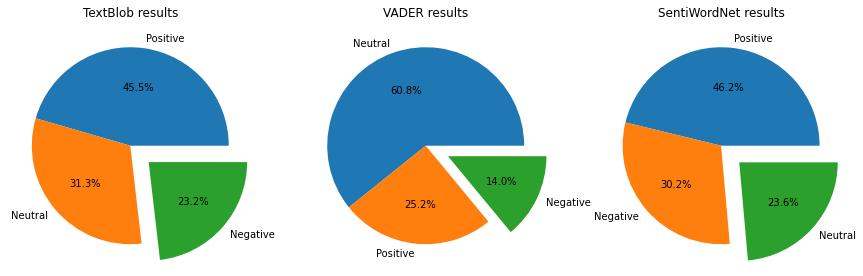

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,7))
fig.patch.set_facecolor('white')

plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(text_blob.values, labels = text_blob.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader.values, labels = vader.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(sentiwordnet.values, labels = sentiwordnet.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.show()

### Most Common words per sentiment in Models

In [11]:
Positive_sent_tb = df[df['Analysis']=='Positive']
Negative_sent_tb = df[df['Analysis']=='Negative']
Neutral_sent_tb = df[df['Analysis']=='Neutral']

Positive_sent_v = df[df['Vader Analysis']=='Positive']
Negative_sent_v = df[df['Vader Analysis']=='Negative']
Neutral_sent_v = df[df['Vader Analysis']=='Neutral']

Positive_sent_swt = df[df['SWN analysis']=='Positive']
Negative_sent_swt = df[df['SWN analysis']=='Negative']
Neutral_sent_swt = df[df['SWN analysis']=='Neutral']

In [12]:
from collections import Counter

def generate_common_dataframe(df_column, gradient_color):
    top = Counter([item for sublist in df_column for item in sublist])
    temp_positive = pd.DataFrame(top.most_common(20))
    temp_positive.columns = ['Common_words','count']
    return temp_positive.style.background_gradient(cmap=gradient_color)

generate_common_dataframe(Positive_sent_tb['token_lemma'], 'Greens')

,Common_words,count
0,get,3306
1,like,3097
2,go,2303
3,good,2062
4,make,2040
5,one,1914
6,time,1880
7,say,1869
8,think,1790
9,know,1784


In [13]:
generate_common_dataframe(Positive_sent_v['token_lemma'], 'Greens')

,Common_words,count
0,like,2569
1,get,2130
2,go,1479
3,make,1429
4,good,1372
5,say,1267
6,one,1242
7,time,1193
8,know,1156
9,would,1144


In [14]:
generate_common_dataframe(Positive_sent_swt['token_lemma'], 'Greens')

,Common_words,count
0,get,3657
1,like,2767
2,go,2141
3,good,1937
4,one,1815
5,make,1790
6,say,1751
7,know,1687
8,time,1646
9,think,1629


In [15]:
generate_common_dataframe(Negative_sent_tb['token_lemma'], 'Reds')

,Common_words,count
0,get,1710
1,like,1443
2,fuck,1145
3,go,1110
4,bad,922
5,say,916
6,make,903
7,would,867
8,one,851
9,know,826


In [16]:
generate_common_dataframe(Negative_sent_v['token_lemma'], 'Reds')

,Common_words,count
0,get,1258
1,fuck,960
2,go,819
3,shit,693
4,like,674
5,bad,665
6,say,619
7,make,615
8,one,595
9,would,577


In [17]:
generate_common_dataframe(Negative_sent_swt['token_lemma'], 'Reds')

,Common_words,count
0,like,1795
1,get,1769
2,go,1364
3,make,1194
4,say,1095
5,one,1044
6,think,1033
7,time,1029
8,would,1019
9,know,958


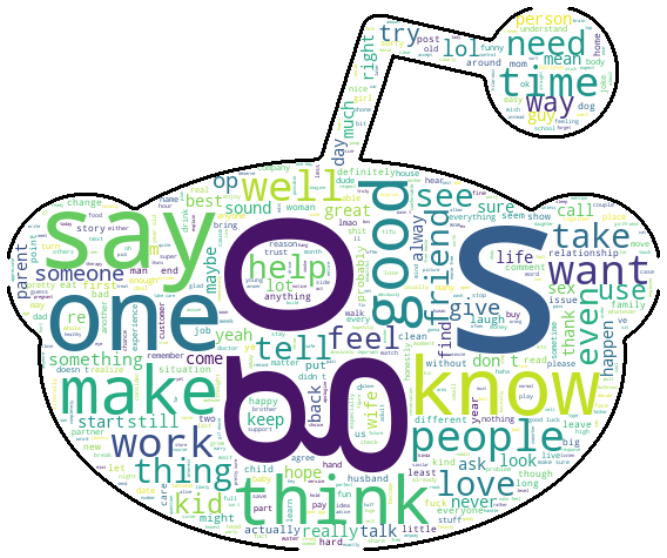

In [20]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def get_wordcloud(df_column, filename):
    reddit_mask = np.array(Image.open('./mascara-reddit.png'))
    wc = WordCloud(background_color="white", max_words=1000, mask=reddit_mask,
                   stopwords=STOPWORDS, contour_width=3)

    # Generate a wordcloud
    lemma_array = df_column.array
    text = ' '.join(lemma_array)

    wc.generate(text)
    wc.to_file(filename)
    # show
    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

get_wordcloud(Positive_sent_v['Lemma'], 'wordcloud_positivas.png')

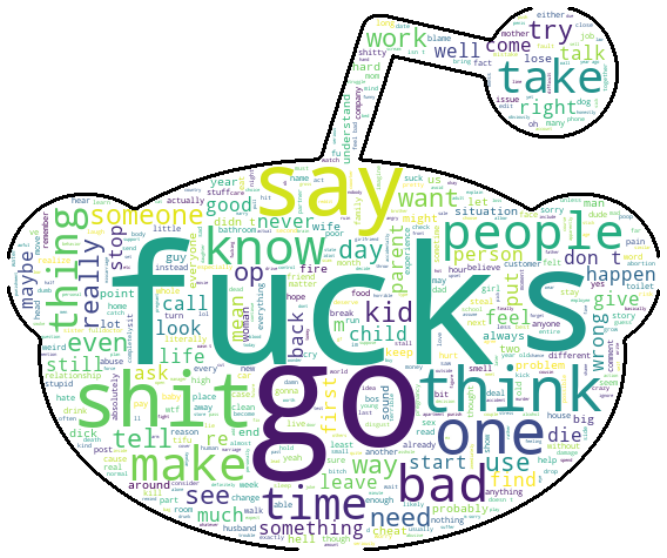

In [21]:
get_wordcloud(Negative_sent_v['Lemma'], 'wordcloud_negativas.png')